# YouTube Trending Videos - Capstone Project 1

YouTube is an incredibly popular platform.  Like many platforms that has sucessfully tapped into the global population - Facebook, Amazon, Google - the numbers can be staggering.  Since the first YouTube upload in 2005 gathering a couple of views in its humble beginning - now there are 1 billion hours of YouTube content viewed daily.  In 2019, there were over 560 million spending globally on the app. The highest paid YouTube creator made 26 million in 2019. Marketers and content creators who can gain insight into users' trends can better serve and reach this growing population.  

## Our Goal
We want to take a look at data gathered from YouTube's trending page to gain some insight into what makes a video popular and what people are watching in order to guide individuals and industries who are interested in sucessful YouTube content creation. 



## The Data

The original dataset comes from the following kaggle for Trending YouTube Video Statistics:

https://www.kaggle.com/datasnaek/youtube-new

The data was collected using the YouTube API to collect data from YouTube's top trending videos.  

On the site it noted that:

"This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day."

"The data also includes a category_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset."

On the YouTube support page:

"Trending helps viewers see what’s happening on YouTube and in the world. Trending aims to surface videos that a wide range of viewers would find interesting. Some trends are predictable, like a new song from a popular artist or a new movie trailer. Others are surprising, like a viral video." 

There are some criteria that YouTube uses to curate their Trending Video page and you can read about it here:

https://support.google.com/youtube/answer/7239739?hl=en

## Standard imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as pp

sns.set()

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

%matplotlib inline

## Explorating the dataset

In [2]:
# reading in csv files
ctry = pd.read_csv('ctry.csv')
cat_id = pd.read_csv('ctry_cat_id.csv')

In [3]:
ctry.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'daily_views', 'time_elapse'],
      dtype='object')

In [4]:
ctry.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,daily_views,time_elapse
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,748374.0,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2418783.0,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,1595717.0,2
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,343168.0,1
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1047865.0,2


Dropping a few columns that we don't need

In [5]:
ctry = ctry.drop(['comments_disabled', 'ratings_disabled', 'video_error_or_removed'], axis=1)

In [6]:
ctry.describe()

,category_id,views,likes,dislikes,comment_count,daily_views,time_elapse
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,4.082800e+04,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,4.067646e+05,16.810423
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,1.095361e+06,146.014303
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,4.760675e+04,3.000000
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,1.300480e+05,5.000000
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,3.518692e+05,9.000000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,3.934993e+07,4215.000000


## Initial observations

One interesting thing is the time_elapse column shows the time between when the video was published and when the video is trending. We see that the max is at day 4,215 however, the mean is only 16.8 days and 75% of the the day all occur before the 9th day.  We also see below that 97.5% of the data occur before the 22nd day.  beThe box plot below shows the skew in the data.  We could probably study the data better by narrowing down to 30 days.  

The boxplot below shows the datapoints so dispersed the reading we get is obviously skewed.  One interesting question for later is what types of videos remain trending much longer than the 97.5% of all trending videos.  

In [7]:
np.percentile(ctry['time_elapse'],[97.5])

array([22.])

## Visualization

### Boxplot

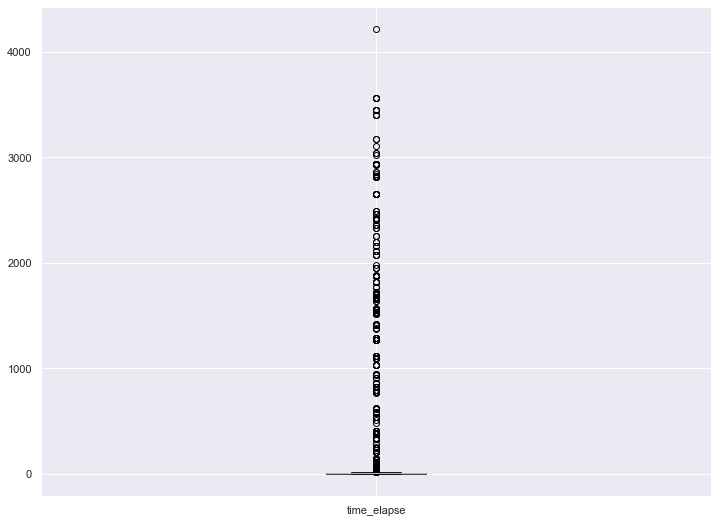

In [8]:
ctry.boxplot(column=['time_elapse'], figsize=(12,9))

Narrowing down to 30 day would give us a good view later when we begin to explore the dataset further.  

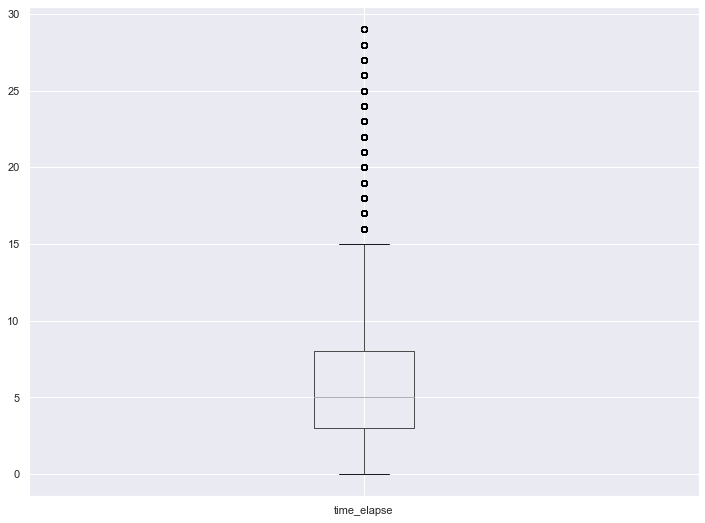

In [9]:
ctry_30 = ctry[ctry.time_elapse < 30]
ctry_30.boxplot(column=['time_elapse'], figsize=(12,9))

### Scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B01D93408>,
      dtype=object)

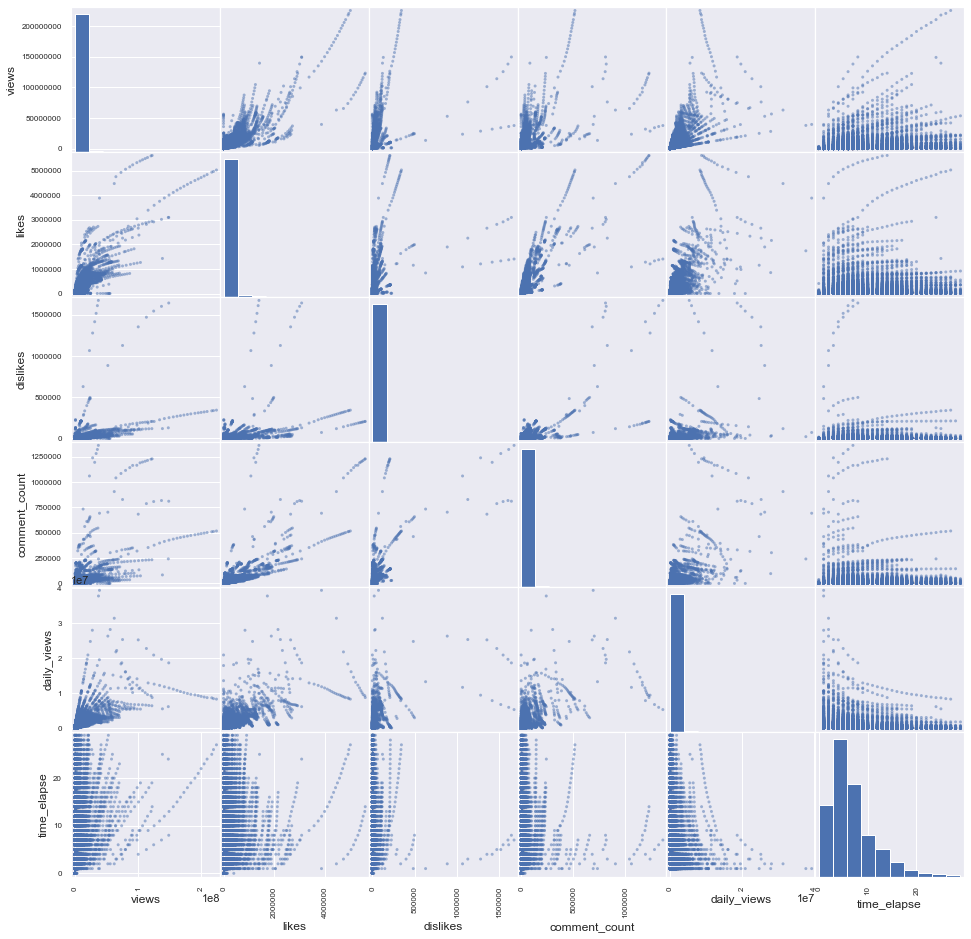

In [10]:
data = ctry_30[['views', 'likes', 'dislikes', 'comment_count', 'daily_views', 'time_elapse']]    
pd.plotting.scatter_matrix(data, figsize=(16,16))

### Looking for Correlations

The scatter matrix shows that are positive correlations between views, likes, dislikes, time elapse and daily views.  The one variable that is negatively correlated with all the others are the daily view counts.  Let's take a closer look at the this and see what we can find out.  

We compare the graph of views and daily views oews goes down over time and we can see that view counts goes up over time while daily views goes down over time.  This is because view counts are cummulative while daily views are not.  Apparently, daily view counts diminish over time.  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


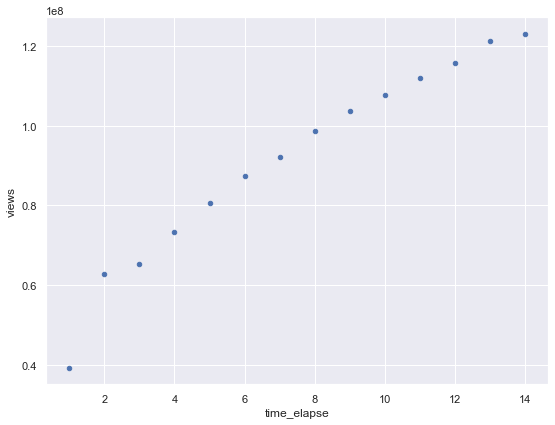

In [11]:
ctry_30[ctry_30.video_id == '7C2z4GqqS5E'].plot.scatter('time_elapse', 'views', figsize=(9,6.75))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


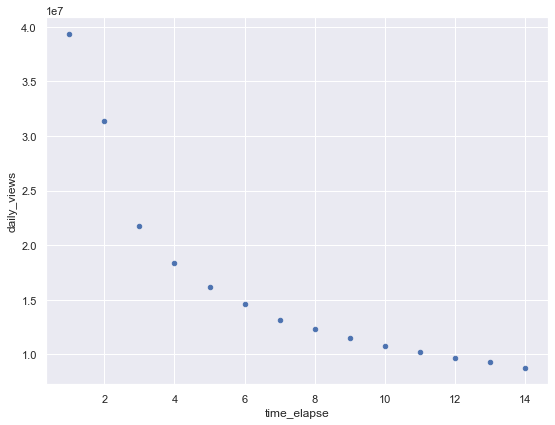

In [12]:
ctry_30[ctry_30.video_id == '7C2z4GqqS5E'].plot.scatter('time_elapse', 'daily_views', figsize=(9,6.75))

### Histograms

From the histogram below we can see that the mean time of trending videos is 5 days and 75% of these videos stay trending for 9 days or less.  The mean total view counts of these videos is 2,360785 and 75% of these videos have 1,823157 views or less. It's interesting that the mean is greater than the 75% quantile mark.  And lastly, the mean daily view count is 406764 and 75% of these videos have 351869 daily views.  Again the mean is greater than the 75% quantile mark.  

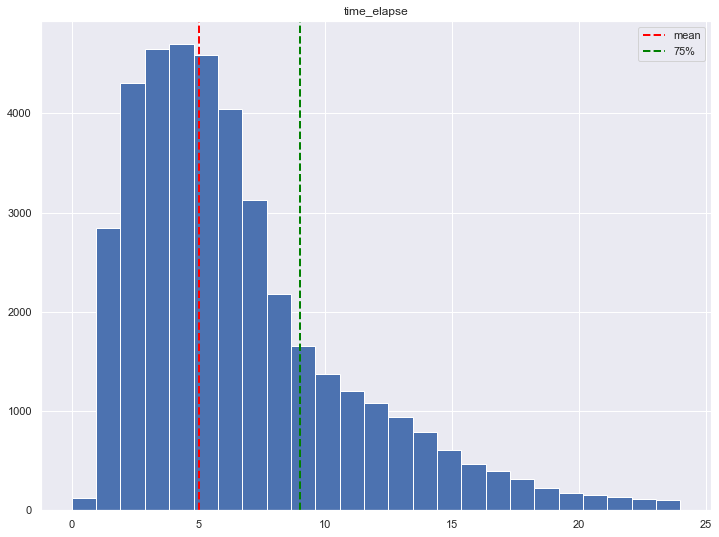

In [13]:
ctry[ctry.time_elapse < 25].hist('time_elapse', bins = 25, figsize = (12,9))
plt.axvline(x = 5, color='red', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(x = 9, color='green', linestyle='dashed', linewidth=2, label = '75%')
plt.legend(title=None, loc='upper right')

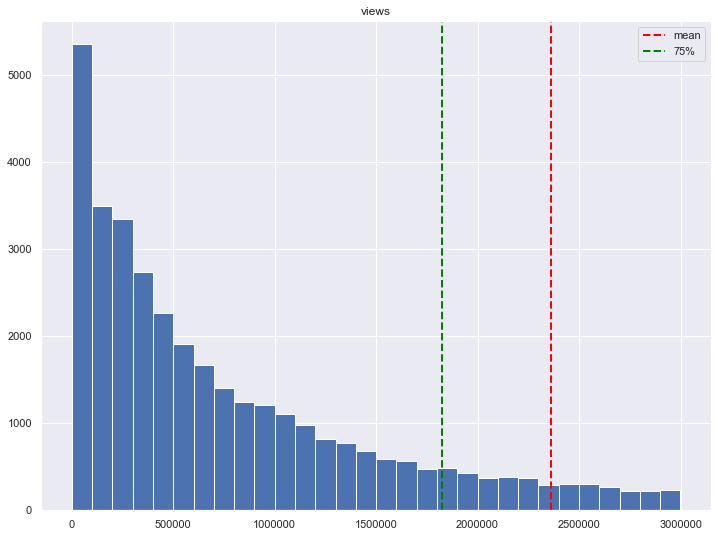

In [14]:
ctry[ctry.views < 3000000].hist('views', bins = 30, figsize = (12,9))
plt.axvline(x = 2360785, color='red', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(x = 1823157, color='green', linestyle='dashed', linewidth=2, label = '75%')
plt.legend(title=None, loc='upper right')

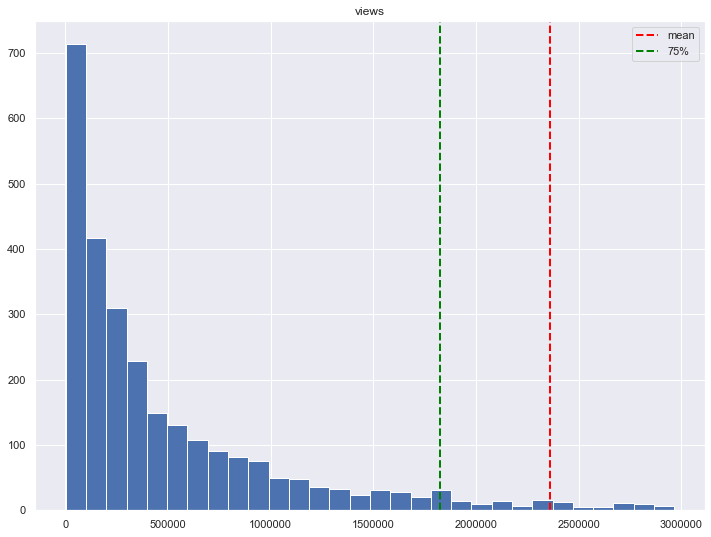

In [15]:
ctry[(ctry.time_elapse == 1) & (ctry.views < 3000000)].hist('views', bins = 30, figsize = (12,9))
plt.axvline(x = 2360785, color='red', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(x = 1823157, color='green', linestyle='dashed', linewidth=2, label = '75%')
plt.legend(title=None, loc='upper right')

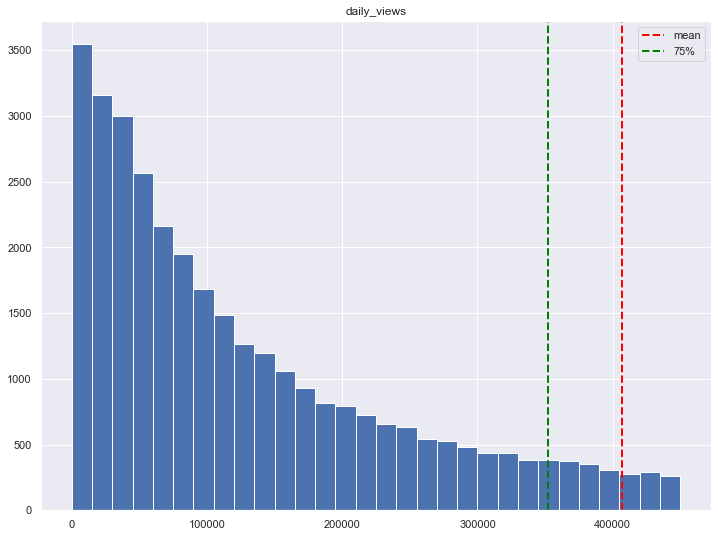

In [16]:
ctry[ctry.daily_views < 450000].hist('daily_views', bins = 30, figsize = (12,9))
plt.axvline(x = 406764, color='red', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(x = 351869, color='green', linestyle='dashed', linewidth=2, label = '75%')
plt.legend(title=None, loc='upper right')

### Scatterplots

The next plot is a little busy and it's hard to see especially where the majority of the data is all clusted in one region.  At a glance we could see the majority of the cluster happen below 200,000 views and majority of the points are clustered before the 9th day - you could see the intensity of the coral coloration indicating a heavy concentration in the bottom left quadrant. This makes sense as we've already discovered 75% of the trending videos are at 9 days or less and 75% of the videos have 1,823157 views or less. 

Text(0.5, 1.0, 'Trending Video View Counts')

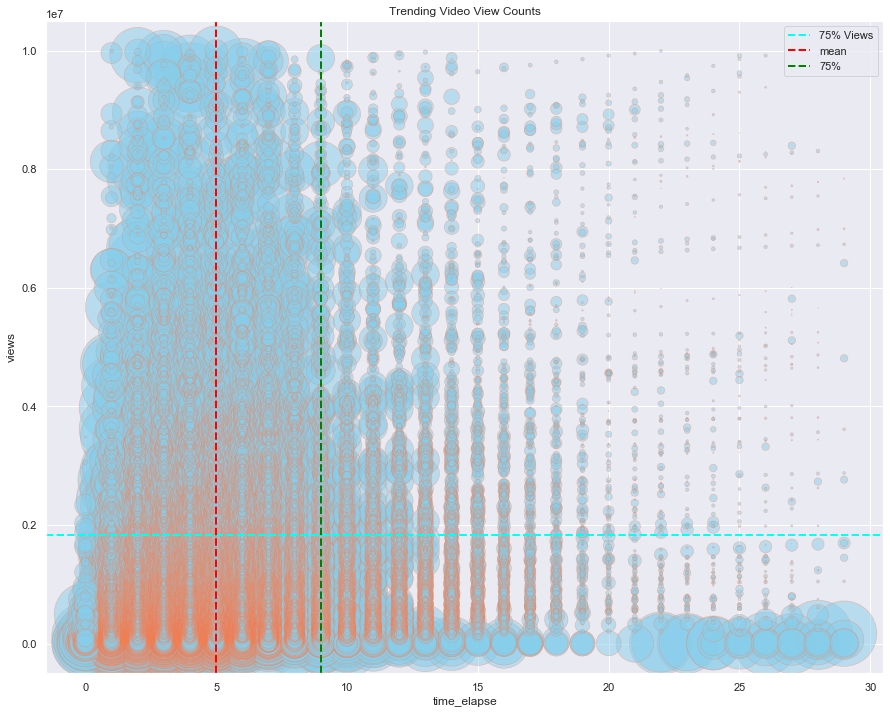

In [17]:
ctry_300 = ctry[(ctry.views < 10000000) & (ctry.time_elapse < 30)]
area = .5e-3 * ctry_300.views.sort_values(ascending=False)

ctry_300.plot.scatter('time_elapse', 'views',
                     s=area, alpha=.5, c='skyblue',
                     linewidths=.5, edgecolors='coral', sharex=False,
                     figsize=(15,12))

plt.axhline(y = 1823157, color='cyan', linestyle='dashed', linewidth=2, label = '75% Views')
plt.axvline(x = 5, color='red', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(x = 9, color='green', linestyle='dashed', linewidth=2, label = '75%')
plt.legend(title=None, loc='upper right')
plt.title('Trending Video View Counts')

Here's the same plot zoomed out and cleaned up a bit to give us an overhead view overlaying one video to show an instance of the data.

Text(0.5, 1.0, 'Trending Video View Counts')

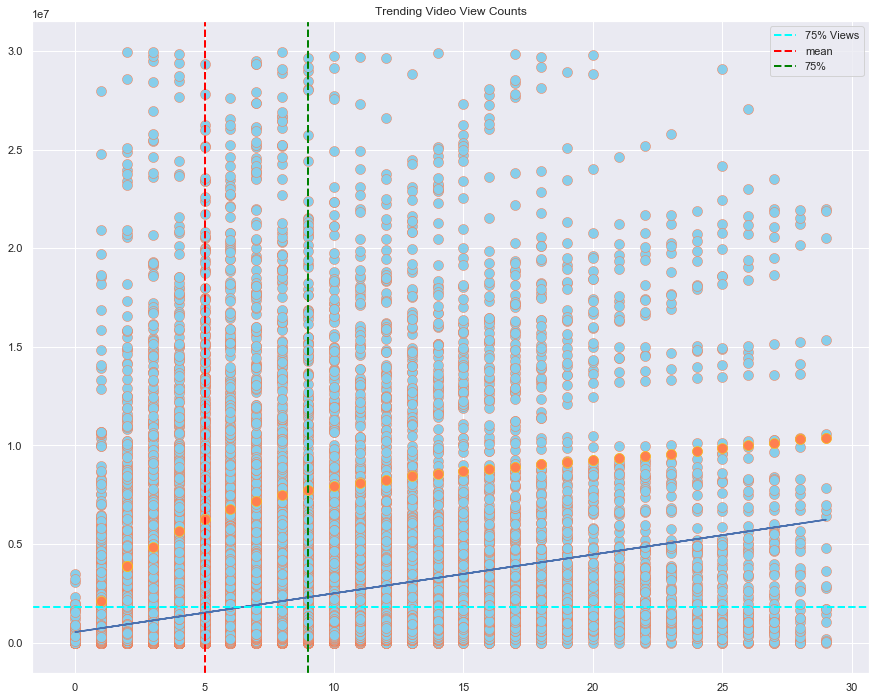

In [18]:
ctry_300 = ctry[(ctry.views < 30000000) & (ctry.time_elapse < 30)]

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

x = ctry_300.time_elapse
y = ctry_300.views
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b)
 
ax1.scatter(x, y,
            s=100, alpha=1, c='skyblue',
            linewidths=.5, edgecolors='coral')

x2 = ctry_300[ctry_300.video_id == 'j4KvrAUjn6c'].time_elapse
y2 = ctry_300[ctry_300.video_id == 'j4KvrAUjn6c'].views

ax1.scatter(x2, y2,
            s=100, alpha=1, c='coral',
            linewidths=.5, edgecolors='gold')

plt.axhline(y = 1823157, color='cyan', linestyle='dashed', linewidth=2, label = '75% Views')
plt.axvline(x = 5, color='red', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(x = 9, color='green', linestyle='dashed', linewidth=2, label = '75%')
plt.legend(title=None, loc='upper right')
plt.title('Trending Video View Counts')


## Top 10 Highest Daily Views

Let's take a look at the top 10 highest daily views.  We see that it's in the range of about 22.7 - 39.3 million views per day. We see below that the most viewed videos are predominately music videos and movie trailers.  

It's hard to get a good feel what makes a trending video when the majority of the highest viewed videos were commercially produced rather than by individuals.  We can dig further to exclude commercially produced trailers and music videos later but for now let's just take a look at what we have so far from this list and some initial conclusion from this list.  

We could see that these videos quickly gained views because there were prior interest for the contect, whether if it was a particular movie or music video.  5 were trailers, 3 were music videos, 1 was a YouTube annual summary, 1 was from a reality TV celebrity and 1 was a YouTube celebrity.  Prior celebrity status played a big part in the top 10 list. 

The only one from the group who came up from complete anonymity was David Dobrik, a YouTube celebrity. David, howver, was not a complete unknown.  He had been creating content for over 4 years and had became known in the YouTube community, which made it possible for him to gain that many view in a single day.  It is possible to amass this level of views coming out from an unknown status and we want to see more of the charactoristics of how these individuals did it.  

In [19]:
ctry[(ctry.daily_views > 15000000) & (ctry.time_elapse == 1)][['title', 'category_id', 'views', 'channel_title']].sort_values('views', ascending=False)

,title,category_id,views,channel_title
35550,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,10,39349927,ibighit
3200,Marvel Studios' Avengers: Infinity War Officia...,24,37736281,Marvel Entertainment
30750,VENOM - Official Trailer (HD),24,27973210,Sony Pictures Entertainment
4600,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,24,24782158,YouTube Spotlight
16181,To Our Daughter,22,20921796,Kylie Jenner
24156,Marvel Studios' Avengers: Infinity War - Offic...,24,19716689,Marvel Entertainment
30752,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,24,18639195,FoxStarHindi
801,"Luis Fonsi, Demi Lovato - Ãchame La Culpa",10,18558186,LuisFonsiVEVO
5001,Jurassic World: Fallen Kingdom - Official Trai...,24,18184886,Universal Pictures
39149,we broke up,22,16884972,David Dobrik


## Titles that have the Most Days on the Trending List

In [20]:
ctry['title'].value_counts().head(20)

WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                                               30
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures             29
The ULTIMATE $30,000 Gaming PC Setup                                                     29
Why I'm So Scared (being myself and crying too much)                                     29
Rooster Teeth Animated Adventures - Millie So Serious                                    29
Sam Smith - Pray (Official Video) ft. Logic                                              29
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex                            29
Charlie Puth - BOY [Official Audio]                                                      29
Bohemian Rhapsody | Teaser Trailer [HD] | 20th Century FOX                               28
John Mayer - New Light                                                                   28
The Deadliest Being on Planet Earth â The Bacteriophage                       

## Categories that Occurred Most in Trending Videos

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


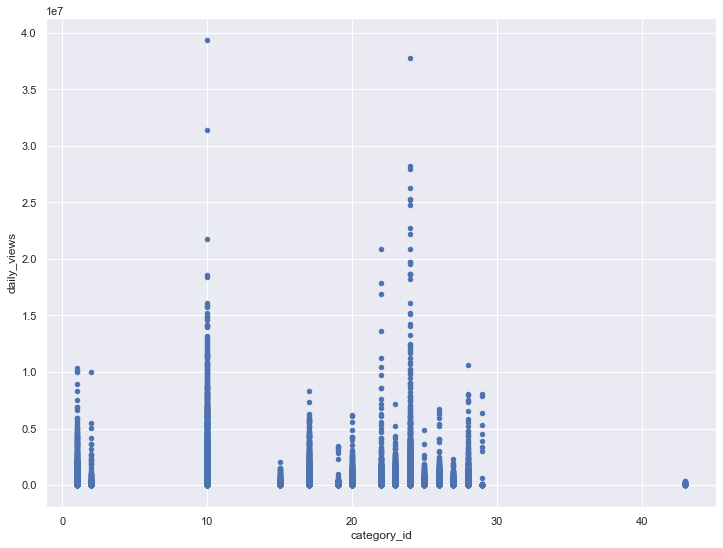

In [21]:
ctry.plot.scatter('category_id', 'daily_views', figsize=(12,9))

In [22]:
ctry['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

In [23]:
cat_id

,category_id,title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


We could see categories #24 (Entertainment) and #10 (Music) occurred the most.  This confirms what we've looked at earlier.  

## Let's Take a Look at Average Daily View Counts

We can see the same trends as above with movie trailers and music videos.  One thing is there are duplicates so we will remove duplicates as we dig deeper.  

In [24]:
ctry.sort_values(by=['daily_views'], ascending=False).head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,daily_views,time_elapse
35550,7C2z4GqqS5E,2018-05-19,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MVD...,39349927.0,1
3200,6ZfuNTqbHE8,2017-11-30,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,There was an ideaâ¦ Avengers: Infinity War. I...,37736281.0,1
35749,7C2z4GqqS5E,2018-05-20,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",62796390,4470888,119046,905912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MVD...,31398195.0,2
3400,6ZfuNTqbHE8,2017-12-01,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157727,34077,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,There was an ideaâ¦ Avengers: Infinity War. I...,28183641.0,2
30750,u9Mv98Gr5pY,2018-04-25,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,2018-04-24,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",27973210,850362,26541,96767,https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,27973210.0,1


## Let's Graph the Daily Views Column

We noted earlier that daily views diminish over time and that 75% of the trending videos will last 9 days or less.  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


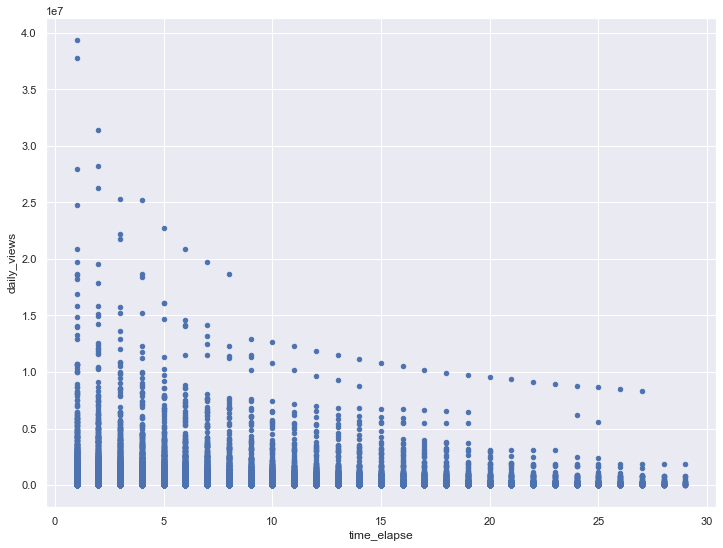

In [25]:
ctry_30.plot.scatter('time_elapse', 'daily_views',figsize=(12,9))

## Videos that have the Longest Time Elapse between Publish Time and Trending Date

We could see that this was between 3400 - 4215 days.  However, the length of time did not mean more views, the highest total view count was 339,306 views. We see that even though the length of time is so long the most number of days these videos appear within that time period is just 9 days. We could see it was flawed to try to calculate daily view counts by dividing total view counts by time elapse because the videos are not trending continuously from upload date to trending date.  

These again are dominated by the Entertainment category. Some items that could find itself here is when a celebrity does something wrong and occasionally the news will report it and peoples' interests are sparked again months or years later after its first published.  

In [26]:
ctry_800 = ctry[ctry.time_elapse > 800]
ctry_800.sort_values('views', ascending=False).drop_duplicates(subset=['title']).head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,daily_views,time_elapse
4307,K7NE3nfdkgg,2017-12-05,Creepy Matt lauer,Itzztonytony,23,2014-02-24,"Mattlauer|""Conan""",339306,528,39,50,https://i.ytimg.com/vi/K7NE3nfdkgg/default.jpg,NaN,245.0,1380
16294,MJO3FmmFuh4,2018-02-05,Budweiser - Original Whazzup? ad,dannotv,24,2006-07-23,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,https://i.ytimg.com/vi/MJO3FmmFuh4/default.jpg,"Original Whazzup ad - however, there is a litt...",61.0,4215
383,6nJw-jPQYVI,2017-11-15,A Day in The Life of David Letterman,Late Show with David Letterman,24,2015-05-21,"cbs|""late show""|""david letterman""|""dave letter...",193832,1351,25,128,https://i.ytimg.com/vi/6nJw-jPQYVI/default.jpg,Follow David Letterman through a typical day o...,213.0,909
3592,iLN0_ghe-Tc,2017-12-01,A Sainty Switch,geicocaveman2012,24,2012-03-24,"saintly|""switch""|""new""|""orleans""|""saints""|""viv...",177098,637,26,72,https://i.ytimg.com/vi/iLN0_ghe-Tc/default.jpg,The plot revolves around an aging NFL quarterb...,85.0,2078
12597,76c_nxhuVdM,2018-01-17,Blade Vs Deacon Frost [Lightsaber Battle],Jamie Demeter,24,2010-04-10,"blade|""lightsaber""|""battle""|""deacon""|""frost""|""...",163780,826,10,167,https://i.ytimg.com/vi/76c_nxhuVdM/default.jpg,Im surprised no one has done this yet.\n\nThis...,57.0,2839
14169,9o2FXVhjLyY,2018-01-25,70's Ads: After Eight Chocolate Mints,PhakeNam,24,2014-08-01,"Chocolate (Food)|""Mint Chocolate (Food)""|""Afte...",156712,2456,191,734,https://i.ytimg.com/vi/9o2FXVhjLyY/default.jpg,70's Ads: After Eight Chocolate Mints,123.0,1273
14591,vBdxi7-_HKw,2018-01-27,Sergei Eisenstein the Father of Montage,Ryan Davidson,22,2013-05-20,"Sergei Eisenstein|""Father of Montage""|""Montage...",139026,427,93,51,https://i.ytimg.com/vi/vBdxi7-_HKw/default.jpg,Short documentary on the life and works of Ser...,81.0,1713
3590,Upems4CB_ps,2017-12-01,Chuck Norris - Hunter - World of Warcraft TV C...,MrNorrisVideos,20,2011-11-20,"Chuck|""Norris""|""Carlos""|""Ray""|""MrNorrisVideos""...",127640,696,52,233,https://i.ytimg.com/vi/Upems4CB_ps/default.jpg,http://www.facebook.com/MasterNorrisCom1 & htt...,57.0,2203
14981,6A3cHzFQsqI,2018-01-29,The Fall - Kurious Oranj,ombremor,10,2012-12-04,"video|""Mark E Smith""|""The Fall""|""Kurious Oranj""",127623,694,7,104,https://i.ytimg.com/vi/6A3cHzFQsqI/default.jpg,The Fall - Kurious Oranj (from I am Kurious Or...,67.0,1882
12993,tYFYoLEO0dM,2018-01-19,The Cranberries - Dreams (Music Video HQ),CrossKut316,10,2009-09-18,"The|""Cranberries""|""Dreams""|""(Music""|""Video""|""HQ)""",114105,621,2,45,https://i.ytimg.com/vi/tYFYoLEO0dM/default.jpg,,37.0,3045


In [27]:
ctry_800[ctry_800.views >= 5000].category_id.value_counts()

24    30
1     29
27    22
22    19
10    15
25    13
28    10
23     8
17     7
2      5
20     2
Name: category_id, dtype: int64

In [28]:
ctry_800[ctry_800.views >= 5000].title.value_counts()

U.S. v. Whistleblower Tom Drake                                                           9
Belle Movie CLIP - Rare And Exotic (2014) - Tom Felton Movie HD                           8
70's Ads: After Eight Chocolate Mints                                                     7
Sergei Eisenstein the Father of Montage                                                   6
Imperial-class Star Destroyer - TIE Bomber                                                6
LL sound in Welsh                                                                         6
Mulan Hair Cut                                                                            5
The Fall - Kurious Oranj                                                                  5
John Cho - Wild World                                                                     5
äºè´µæè·¤ - tienghoa.net                                                               5
Oh What a Feeling. Toyota! 1982                                                 

In [29]:
ctry_800.describe()

,category_id,views,likes,dislikes,comment_count,daily_views,time_elapse
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,18.153846,49129.523077,281.394872,30.338462,68.805128,27.815385,1971.856410
std,9.619403,56167.445634,442.623799,66.236676,132.017271,39.040380,739.682984
min,1.000000,2302.000000,1.000000,0.000000,0.000000,0.000000,824.000000
25%,10.000000,8127.500000,33.500000,1.000000,4.000000,5.000000,1410.500000
50%,23.000000,26243.000000,82.000000,4.000000,19.000000,13.000000,1770.000000
75%,25.000000,68084.500000,427.500000,23.000000,83.000000,35.000000,2465.500000
max,28.000000,339306.000000,2456.000000,312.000000,755.000000,245.000000,4215.000000


## Eliminating movie trailers, music videos and commercial broadcast producers

We mentioned earlier that the most views are generated by movie trailers, music videos and other commercially produced videos that naturally amass views because the subjects already have celebrity status. 

One way to capitalize on this is to have your content be about these subjects and ride the wave of their popularity - for example there are alot of cover singers who will get views because of the popularity of the songs they are covering.  

However, we are interested to see what remains when we strip the data from these so we could see trending content of a regular YouTube content creator. 

In [30]:
ctry_elim = ctry[ctry.channel_title != 'ArianaGrandeVevo'] 
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Marvel Entertainment']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Sony Pictures Entertainment']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'YouTube Spotlight']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'FoxStarHindi']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'LuisFonsiVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Universal Pictures']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'ibighit']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'TaylorSwiftVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Bruno Mars']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'jbalvinVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'HBO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Disneyâ¢Pixar']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Paramount Pictures']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Maroon5VEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'T-Mobile']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Jeep']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'NFL']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Ed Sheeran']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Apple']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'SpaceX']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Cardi B']
ctry_elim = ctry_elim[ctry_elim.channel_title != '20th Century Fox']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'The Tonight Show Starring Jimmy Fallon']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'SelenaGomezVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'BeckyGVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'shakiraVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'DemiLovatoVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'WWE']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'WIRED']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Star Wars']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'justintimberlakeVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Jimmy Kimmel Live']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Dua Lipa']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'The Late Late Show with James Corden']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'EminemVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'The Official PokÃ©mon YouTube channel']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'NickiMinajAtVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Vevo']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'NickyJamTV']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'PBS NewsHour']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'OVO Sound']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'MigosVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Disney Movie Trailers']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'SMTOWN']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'KendrickLamarVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'BANGTANTV']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'ZEDDVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Walt Disney Animation Studios']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Bethesda Softworks']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'ChainsmokersVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Cobra Kai']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Warner Bros. Picture']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Saturday Night Live']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Gorillaz']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'NBC']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Hannah Stocking']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Super Netvid']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'FamilyFeud']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'TheEllenShow']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Kylie Jenner']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Warner Bros. Pictures']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Fifty Shades']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Kanye West']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'CelineDionVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Tide']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Vogue']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Nintendo']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'MLG Highlights']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'CamilaCabelloVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'BackstreetBoysVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != '1theK (ìëì¼ì´)']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'ShawnMendesVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'ESPN']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'TWICE JAPAN OFFICIAL YouTube Channel']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'KatyPerryVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'PinkVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Battlefield']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'CAguileraVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'FiftyShadesVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'The Late Show with Stephen Colbert']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Nicki Minaj']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'ZaynVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Pitch Perfect']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Mnet K-POP']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'BuzzFeedVideo']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'The Daily Show with Trevor Noah']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Google Developers']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Adult Swim']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Shawn Mendes']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'CalvinHarrisVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Team Coco']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'EverythingApplePro']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'BURGER KING']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'BBC Radio 1']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Disney Descendants']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'æ°å¨ç¾é³æ¨ JVR Musi']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'TIME']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Netflix']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'TODAY']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'ONE Media']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'HalseyVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Breakfast Club Power 105.1 FM']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'The Voice']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Oscars']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'carrieunderwoodVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'LouisTomlinsonVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'GEazyMusicVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Washington Post']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'KhalidVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'PlayStation']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'CNN']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'CollegeHumor']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'TroyeSivanVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Snapchat']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Prince']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'EntertainmentVevo']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'ThomasRhettVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'RemyMaVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'NFL Network']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'TMZ']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'RemyMaVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'CBS Los Angeles']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Gordon Ramsay']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Will Smith']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'The X Factor UK']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Vanity Fair']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'ET Canada']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'American Idol']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'NBA on TNT']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'The Verge']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Amazon Studios']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'SamSmithWorldVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'FallOutBoyVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'ExplosmEntertainment']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Jeopardy!']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'LadyGagaVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Groupon']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'DJSnakeVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'PokÃ©mon GO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Recording Academy / GRAMMYs']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'KBSKpop']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'NBA']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'SiaVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != '5FDPVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'FrenchMontanaVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'NBC Sports']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Google']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'LuisFonsiVEVO']
ctry_elim = ctry_elim[ctry_elim.channel_title != 'Marshmello']
ctry_elim = ctry_elim[ctry_elim.channel_title != "America's Got Talent"]
ctry_elim = ctry_elim[ctry_elim.channel_title != "gameslice"]

ctry_elim_list =  ctry_elim[(ctry_elim.daily_views > 1) & (ctry_elim.time_elapse == 1)][['title', 'category_id', 'views', 'channel_title']].sort_values('views', ascending=False)
ctry_elim_list.head(10)

,title,category_id,views,channel_title
39149,we broke up,22,16884972,David Dobrik
10000,So Sorry.,24,13305605,Logan Paul Vlogs
14000,Suicide: Be Here Tomorrow.,29,8041970,Logan Paul Vlogs
4001,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,26,6315549,5-Minute Crafts
40350,Town Hall 12 Update is Here! (Clash of Clans O...,20,6173038,Clash of Clans
33950,Clash Royale: Meet the Rascals! (New Card!),20,6142430,Clash Royale
33350,Fortnite with Ninja | Dude Perfect,17,5589612,Dude Perfect
16780,MOMMY AND DAUGHTER SURPRISE DADDY WITH PREGNAN...,22,4990782,The ACE Family
21965,World's Longest LEGO Walk | Dude Perfect,17,4852889,Dude Perfect
6207,Anitta & J Balvin - Downtown (Official Lyric V...,23,4190444,Lele Pons


In [31]:
ctry_elim.describe()

,category_id,views,likes,dislikes,comment_count,daily_views,time_elapse
count,33097.000000,3.309700e+04,3.309700e+04,3.309700e+04,3.309700e+04,3.303700e+04,33097.000000
mean,20.303472,1.730187e+06,5.438570e+04,2.832393e+03,6.618255e+03,2.693491e+05,19.437139
std,7.537578,5.910745e+06,1.544890e+05,2.360328e+04,2.779812e+04,6.053979e+05,162.286907
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,17.000000,2.087990e+05,5.010000e+03,1.760000e+02,5.580000e+02,4.084700e+04,3.000000
50%,24.000000,5.814840e+05,1.651400e+04,5.460000e+02,1.698000e+03,1.059990e+05,6.000000
75%,25.000000,1.500329e+06,4.906000e+04,1.616000e+03,5.181000e+03,2.708800e+05,9.000000
max,43.000000,2.252119e+08,5.023450e+06,1.674420e+06,1.361580e+06,1.688497e+07,4215.000000


Here we now see more of the regular content creator.  The interesting thing is that the view counts are still pretty high for this subgroup.  The mean views is 1.7 million views. They fall in the categories of People and Blogs and Gaming for the top ones. Remember that the highest paid YouTube creator in 2019 made 26 million.  Below we see a breakdown histogram of the categories and they match closely with the original dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B05A36E88>]],
      dtype=object)

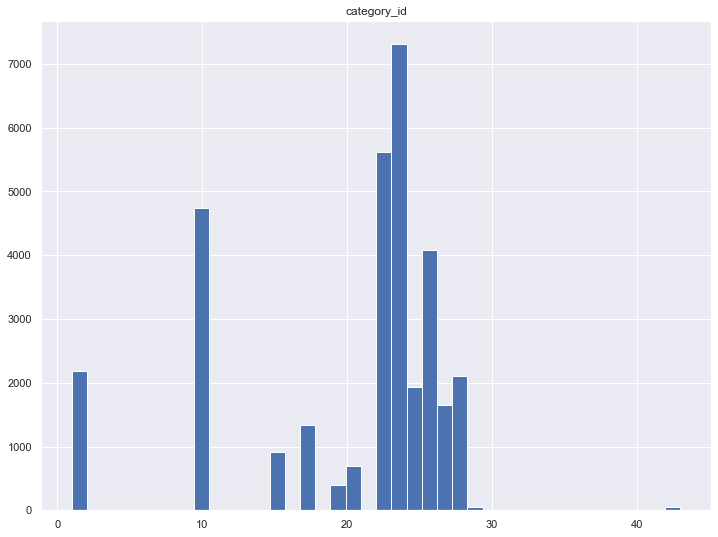

In [32]:
ctry_elim.hist('category_id', bins = 40, figsize = (12,9))

In [33]:
ctry_elim.category_id.value_counts()

24    7306
10    4745
26    4083
22    2925
23    2692
28    2105
25    1941
1     1817
27    1656
17    1334
15     920
20     691
19     402
2      366
29      57
43      57
Name: category_id, dtype: int64

In [34]:
cat_id

,category_id,title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


## Applying NLP

We want to apply Natural Language Processing to some columns (the "title" column) to see if we can gain insight on some words and topics that lead to videos that will get more views.  

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
import re

text = ctry_elim.title

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

# we set ngram_range for the CountVectorizer to get context around each word
vectorizer = CountVectorizer(min_df=1, analyzer='word', ngram_range=(3, 3))

# we create a function that will get rid of punctuations, tokenize, stem and remove stopwords
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

clean_text(text)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

print("")
print("Transformed text vector is \n{}".format(x)[0:140])

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names()[0:60000:500])


Transformed text vector is 
  (0, 713)	1
  (0, 19983)	1
  (0, 22065)	1
  (0, 23427)	1
  (0, 23671)	1
  (1, 11242)	1
  (1, 11939)	1
  (1, 167

Words for each feature:
['000 00 camera', '30 feet under', 'alec steele collab', 'and twitter actually', 'attempt test kitchen', 'before seen videos', 'boseman gets emotional', 'by your name', 'challenge with brian', 'colour blind glasses', 'cut aid over', 'dies after crashing', 'drank energy drinks', 'evans make cast', 'feat twin shadow', 'for former first', 'ft tove lo', 'gold games aspen', 'harry styles canta', 'holiday makeup look', 'if this is', 'interesting electric suv', 'jamie foxx and', 'kelly ambassadors bebe', 'lavar ball article', 'long french fry', 'making new sounds', 'melting every lipstick', 'most subscribed youtubers', 'neck bass solo', 'of 50 000', 'on cartoon hangover', 'own way official', 'pizza pouch wearable', 'puppy bowl spot', 'republicans praise trump', 'ryobi tools for', 'sex of kitten', 'smoke behave in', 'stephon marb

We want to use the naive bayes classifier to predict subjects that will bring in higher view counts.  We make our y to be videos that gain 580,000 views or more - this is the threshold for 50% of our videos in this data set.  

In [39]:
#Create a function to get our X, y   
def make_xy(ctry_elim, vectorizer=None):  
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(text)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (ctry_elim.views >= 580000)  # this is the threshold for 50% of the videos in this set
    return X, y
X, y = make_xy(ctry_elim)

In [40]:
#Splitting our data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = clf.predict(X_test)

print("Accuracy of Training Set: {}".format(clf.score(X_train, y_train)))
print("Accuracy of Test Set: {}".format(clf.score(X_test, y_test)))

Accuracy of Training Set: 0.899724289005552
Accuracy of Test Set: 0.8790030211480363


Text(0.5, 1.0, 'Cumulative Distribution')

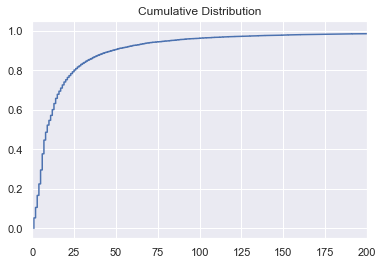

In [41]:
# Finding the best df
df = np.sort(np.sum(X>0,axis=0)).reshape(-1,1)
n=len(df)
cdf_df= np.arange(1, n+1) / n

plt.plot(df,cdf_df)
plt.xlim([0,200])
plt.title('Cumulative Distribution')

We create a cummulative distribution of the document frequencies, some good numbers for min_df to get an idea of min_df.  from the graph a good min_df = 1 max_df = 125

## Cross-Validation and hyper-parameter fitting

We use KFold and a log-likelihood function for our naive bayes classifier.

In [42]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y.iloc[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y.iloc[test]) # evaluate score function on held-out data
    return result / nfold # average

In [43]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    good = y 
    bad = ~good
    return prob[good, 0].sum() + prob[bad, 1].sum()

In [44]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(ctry_elim.shape[0]), train_size=0.7)
mask = np.zeros(ctry_elim.shape[0], dtype=np.bool)
mask[itest] = True

In [45]:
from sklearn.naive_bayes import MultinomialNB

#the grid of parameters to search over
alphas = [.1, 1, 5]
min_dfs = [1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:
        vectorizer = CountVectorizer(min_df = min_df)
        Xthis, ythis = make_xy(ctry_elim, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

In [46]:
print("best alpha: {}".format(best_alpha))
print("min_df: {}".format(best_min_df))
print("best score: {}".format(maxscore))

best alpha: 5
min_df: 1
best score: -2436.585239358151


We use the best alpha and min_df parameters to cross validate for training and test accuracy score.

In [47]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(ctry_elim, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.870191
Accuracy on test data:     0.800104


In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, clf.predict(xtest)))

[[8950 2532]
 [2099 9586]]


## Looking at some predictive features
We generate a list of strongly predictive features.  These are subjects and words that are associated with gaining high view counts.  We will test a few titles to see if they could be a hit or not among YouTube audiences.  

In [56]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:100]]
bad_words = words[ind[-100:]]

good_prob = probs[ind[:100]]
bad_prob = probs[ind[-100:]]

print("Good words\t     P(good | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(good | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(good | word)
               react 0.91
                dude 0.89
                less 0.89
              spider 0.89
            trailers 0.87
               wrong 0.87
              babish 0.87
                yiay 0.86
              theory 0.86
                lele 0.85
               anwar 0.85
              jibawi 0.85
                 bgt 0.85
                pons 0.85
               twice 0.85
               lucky 0.85
              khalid 0.85
              escape 0.84
          pentatonix 0.84
                  mo 0.84
             mancuso 0.83
                slow 0.83
                rudy 0.82
                  s9 0.82
             gourmet 0.82
               jason 0.82
               zones 0.82
               lopez 0.82
             sneaker 0.82
             complex 0.82
                puth 0.82
              guetta 0.82
               shots 0.81
              prison 0.81
             binging 0.81
               lucas 0.81
              honest 0.81
       

In [50]:
good_words

array(['react', 'dude', 'less', 'spider', 'trailers', 'wrong', 'babish',
       'yiay', 'theory', 'lele', 'anwar', 'jibawi', 'bgt', 'pons',
       'twice', 'lucky', 'khalid', 'escape', 'pentatonix', 'mo',
       'mancuso', 'slow', 'rudy', 's9', 'gourmet', 'jason', 'zones',
       'lopez', 'sneaker', 'complex', 'puth', 'guetta', 'shots', 'prison',
       'binging', 'lucas', 'honest', 'lava', 'fast', 'spicy', 'fort',
       'tinashe', 'lovely', 'underwood', 'auditions', 'well', 'bts',
       'collection', 'trick', 'gadgets', 'calories', 'card', 'hacks',
       'perfect', 'ones', 'coca', 'buzzer', 'el', 'wings', 'dear',
       'gomez', 'even', 'tunnel', 'aiko', 'eilish', 'billie', 's5',
       'underground', 'bobby', 'jhenã', 'primitive', 'trainor', 'montana',
       'bags', 'glynne', 'blind', 'jess', 'every', 'anthem', 'galaxy',
       'ant', 'cheap', 'cha', 'flames', 'gauntlet', 'size', 'stirling',
       'khaled', 'vol', 'organized', 'namiko', 'prototype', 'according',
       'graphics

Below is a test run of possible titles to see the probability of it being a popular video:

In [51]:
clf.predict_proba(vectorizer.transform(['top 10 ways to make money working from home in 6 months']))

array([[0.8806663, 0.1193337]])

This title has a 11% probability of being a hit.  

In [52]:
clf.predict_proba(vectorizer.transform(["top 10 ways to make money working from prison you don't have to be sorry about"]))

array([[0.19830939, 0.80169061]])

This one at 80% has a lot better chance.

In [53]:
clf.predict_proba(vectorizer.transform(["Why my neighbor brought a dog with the weirdest eyes on holidays with them"]))

array([[0.57510384, 0.42489616]])

This one has a 42% chance of being a big hit - although this title peaks my interest, it's predicted to be just a little lower 50% of being a hit.

In [55]:
clf.predict_proba(vectorizer.transform(["My perfect nightmares involve falling slowly on the wrong trampoline"]))

array([[0.00599502, 0.99400498]])

Our final text title scores a high 99% - this title has a potential of being a star. This is because we chose 3 words from our list of good words: wrong, perfect and slow - to form our topic.

## Conclusion
This short exploration gives us some ideas of what makes a video trend on YouTube. Firstly, we find that movie trailers, music videos and commercially produced videos easily top the list for most viewed videos. This makes sense because these are already established brands and people with celebrity status. We also noted that there are categories that are more popular. Entertainment and Sports tops the list, but right after comes How Tos and Style followed by Comedy, People and Blogs and News and Politics followed by Science and Technology. One way to take advantage of this is to make content in these popular subjects and categories or about them.

We find that when we eliminate the movie trailers, music videos and large commercial producers we get more of the regular content creators who create interesting vlog. Some gain views because they posted content that sparked the ire of the viewers and the content goes viral as well as the following apology video. Popular categories remain the same as before. What's interesting about this subset of regular content creators is that they have the potential of creating their own brand and bringing their status and viewership level to match celebrity and commercial producers. They build their viewership from the bottom up rather than from the top down.

Lastly, we did some NLP to find some predictive words and topics that can generate more views. This list and our list of popular categories can help develop content and subjects that interest the viewers.
